In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.shape

(50, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
hopkins(df, df.shape[0])

0.450140214734648

In [8]:
hopkins(scale(df), df.shape[0])

0.39407291629696867

In [9]:
k_means = KMeans(n_clusters=2).fit(df)

In [10]:
clusters = k_means.labels_

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

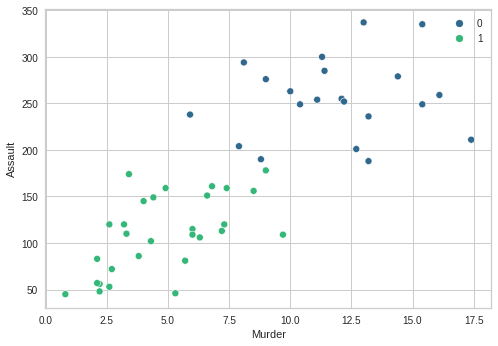

In [11]:
sns.scatterplot(x=df.Murder, y=df.Assault, hue=clusters, palette="viridis")

In [12]:
centroids = k_means.cluster_centers_

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

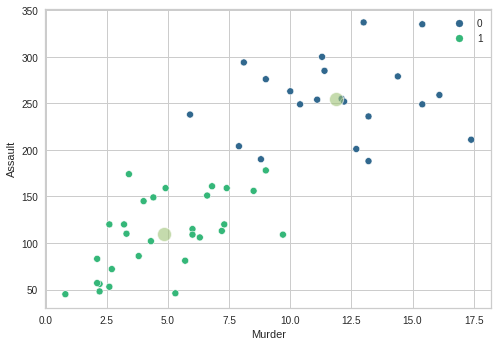

In [13]:
sns.scatterplot(x=df.Murder, y=df.Assault, hue=clusters, palette="viridis")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=200, alpha=0.6)

In [14]:
ssd = []

K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Inertia')

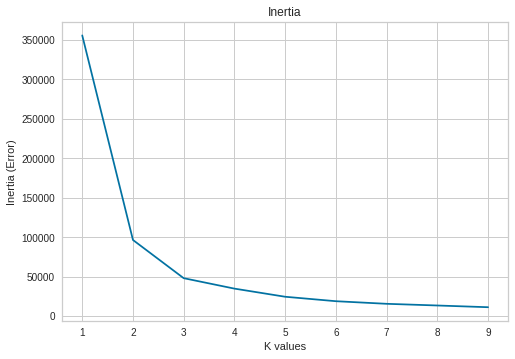

In [15]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K values")
plt.ylabel("Inertia (Error)")
plt.title("Inertia")

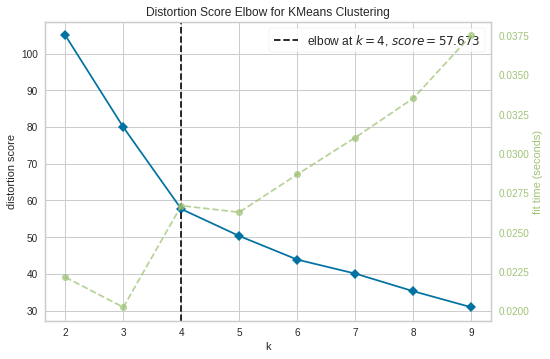

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Let's use yellowbrick to visualize the elbow method.

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(scale(df))
visualizer.poof()

In [17]:
kmeans = KMeans(n_clusters=4).fit(df)

In [18]:
labels = kmeans.labels_

In [19]:
df["pred_labels"] = labels

In [20]:
df.head()

,Murder,Assault,UrbanPop,Rape,pred_labels
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


In [22]:
print(f"Silhouette Score(n=4): {silhouette_score(df, labels)}")

Silhouette Score(n=4): 0.5017569886048432


In [23]:
# If our silhouette score is close to 1, it means that clusters are separated from each other
# very well (means clusters are sort of far from each other without data points getting mixed
# in different clusters) and integration within same clusters are accomplished more successfully.

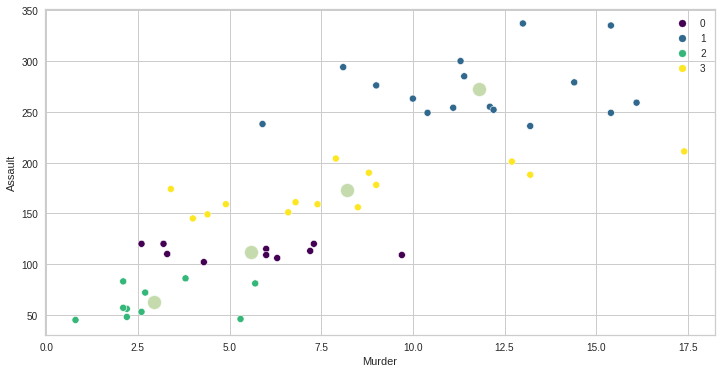

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df.Murder, y=df.Assault, hue=labels, s=50, palette="viridis")
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:,1], s=200, alpha=0.6)
plt.show()

In [35]:
new_df = df.sample(15)

In [36]:
new_df

,Murder,Assault,UrbanPop,Rape,pred_labels
Rhode Island,3.4,174,87,8.3,3
Delaware,5.9,238,72,15.8,1
California,9.0,276,91,40.6,1
Georgia,17.4,211,60,25.8,3
Oregon,4.9,159,67,29.3,3
Connecticut,3.3,110,77,11.1,0
Louisiana,15.4,249,66,22.2,1
South Carolina,14.4,279,48,22.5,1
Maryland,11.3,300,67,27.8,1
South Dakota,3.8,86,45,12.8,2


In [37]:
new_df["true_labels"] = [3,1,1,2,3,1,1,1,2,2,2,3,1,1,3]

In [38]:
new_df

,Murder,Assault,UrbanPop,Rape,pred_labels,true_labels
Rhode Island,3.4,174,87,8.3,3,3
Delaware,5.9,238,72,15.8,1,1
California,9.0,276,91,40.6,1,1
Georgia,17.4,211,60,25.8,3,2
Oregon,4.9,159,67,29.3,3,3
Connecticut,3.3,110,77,11.1,0,1
Louisiana,15.4,249,66,22.2,1,1
South Carolina,14.4,279,48,22.5,1,1
Maryland,11.3,300,67,27.8,1,2
South Dakota,3.8,86,45,12.8,2,2


In [41]:
# Let's calculate the adjusted rand score now. Please keep in mind that to calculate this,
# we need an expert with the domain knowledge to point out clustering mistakes in a sample.

In [42]:
adjusted_rand_score(new_df["true_labels"], new_df["pred_labels"])

0.4422310756972112

In [44]:
# When ARI score is close to 0, it means the machine's clusterings are terrible.
# When ARI score gets closer to 1, the better clusterings the machine achieved.
# ARI score has a scale of -1 to 1.